# Programming Exercise 1

In this assignment you will implement one or more algorithms for the all-pairs shortest-path problem.  Here are data files describing three graphs: 

(See C4W1_g1.txt)

(See C4W1_g2.txt)

(See C4W1_g3.txt)

The first line indicates the number of vertices and edges, respectively.  Each subsequent line describes an edge (the first two numbers are its tail and head, respectively) and its length (the third number).  NOTE: some of the edge lengths are negative.  NOTE: These graphs may or may not have negative-cost cycles.

Your task is to compute the "shortest shortest path".  Precisely, you must first identify which, if any, of the three graphs have no negative cycles.  For each such graph, you should compute all-pairs shortest paths and remember the smallest one (i.e., compute \min_{u,v \in V} d(u,v),  where d(u,v) denotes the shortest-path distance from u to v). 

If each of the three graphs has a negative-cost cycle, then enter "NULL" in the box below.  If exactly one graph has no negative-cost cycles, then enter the length of its shortest shortest path in the box below.  If two or more of the graphs have no negative-cost cycles, then enter the smallest of the lengths of their shortest shortest paths in the box below.

OPTIONAL: You can use whatever algorithm you like to solve this question.  If you have extra time, try comparing the performance of different all-pairs shortest-path algorithms!

OPTIONAL: Here is a bigger data set to play with.

(See C4W1_large.txt)

For fun, try computing the shortest shortest path of the graph in the file above.

In [6]:
class BF:
    def __init__(self, filename):
        text_file = open(filename, "r")
        lines = text_file.readlines()
        data = [i.strip().split(" ") for i in lines[0:]]
        data = [[int(j) for j in i] for i in data]
        text_file.close()

        self.n = data[0][0]
        self.m = data[0][1]
        self.graph = {}
        for line in data[1:]:
            self.graph[line[0], line[1]] = line[2]
        print("Processing file: " + filename)
        self.all_pair_min()


    def bellman_ford(self, s):
        A = {}

        A = {(0, v):float('inf') for v in range(1, self.n + 1)}
        A[0, s] = 0
        
        for i in range(1, self.n):
            for v in range(1, self.n + 1):
                A_temp = [A[i - 1, w] + self.graph[w, v] for w in range(1, self.n + 1) if (w, v) in self.graph]
                A[i, v] = min(A[i - 1, v], min(A_temp))

        # run BF one more time to detect negative cycles
        for v in range(1, self.n + 1):
            A_temp = [A[self.n - 1, w] + self.graph[w, v] for w in range(1, self.n + 1) if (w, v) in self.graph]
            if min(A_temp) < A[self.n - 1, v]:
                return None

        return min([A[self.n - 1, v] for v in range(1, self.n + 1)])


    def all_pair_min(self):
        min_dist = float('inf')
        for s in range(1, self.n + 1):
            if s % 10 == 0:
                print("Performing BF: " + str(s)+ " out of " + str(self.n))
            dist = self.bellman_ford(s)
            if dist is None:
                print("Negative cycle detected! Answer: NULL")
                return
            if dist < min_dist:
                min_dist = dist
                #print("New minimum distance: " + str(min_dist))
        c
        return


def main():
    G1 = BF('C4W1_g1.txt')
    print("--------------------------------")
    G1 = BF('C4W1_g2.txt')
    print("--------------------------------")
    G1 = BF('C4W1_g3.txt')

if __name__ == '__main__':
    main()

Processing file: C4W1_g1.txt
Performing BF: 1 out of 1000
Negative cycle detected! Answer: NULL
--------------------------------
Processing file: C4W1_g2.txt
Performing BF: 1 out of 1000
Negative cycle detected! Answer: NULL
--------------------------------
Processing file: C4W1_g3.txt
Performing BF: 0 out of 1000
Performing BF: 10 out of 1000
Performing BF: 20 out of 1000
Performing BF: 30 out of 1000
Performing BF: 40 out of 1000
Performing BF: 50 out of 1000
Performing BF: 60 out of 1000
Performing BF: 70 out of 1000
Performing BF: 80 out of 1000
Performing BF: 90 out of 1000
Performing BF: 100 out of 1000
Performing BF: 110 out of 1000
Performing BF: 120 out of 1000
Performing BF: 130 out of 1000
Performing BF: 140 out of 1000
Performing BF: 150 out of 1000
Performing BF: 160 out of 1000
Performing BF: 170 out of 1000
Performing BF: 180 out of 1000
Performing BF: 190 out of 1000
Performing BF: 200 out of 1000
Performing BF: 210 out of 1000
Performing BF: 220 out of 1000
Performing 

In [9]:
from collections import defaultdict
import heapq as heap

class Johnson:
    '''Around 10 times faster than pure BF (1-2 hours)'''
    def __init__(self, filename):
        text_file = open(filename, "r")
        lines = text_file.readlines()
        data = [i.strip().split(" ") for i in lines[0:]]
        data = [[int(j) for j in i] for i in data]
        text_file.close()

        self.n = data[0][0]
        self.m = data[0][1]
        self.graph = {}
        for line in data[1:]:
            self.graph[line[0], line[1]] = line[2]
        print("Processing file: " + filename)
        self.all_pair_min()


    def bellman_ford(self, s):
        A = {}

        A = {(0, v):float('inf') for v in range(1, self.n + 1)}
        A[0, s] = 0
        
        for i in range(1, self.n):
            for v in range(1, self.n + 1):
                A_temp = [A[i - 1, w] + self.graph[w, v] for w in range(1, self.n + 1) if (w, v) in self.graph]
                if A_temp != []:
                    A[i, v] = min(A[i - 1, v], min(A_temp))
                else:
                    A[i, v] = A[i - 1, v]

        # run BF one more time to detect negative cycles
        for v in range(1, self.n + 1):
            A_temp = [A[self.n - 1, w] + self.graph[w, v] for w in range(1, self.n + 1) if (w, v) in self.graph]
            if A_temp != []:
                if min(A_temp) < A[self.n - 1, v]:
                    return None

        return [A[self.n - 1, v] for v in range(1, self.n + 1)]
    
    
    def dijkstra(self, s):
        visited = set()
        parentsMap = {}
        pq = []
        nodeCosts = defaultdict(lambda: float('1000000'))
        nodeCosts[s] = 0
        heap.heappush(pq, (0, s))

        while pq:
            _, node = heap.heappop(pq)
            visited.add(node)

            for graphNode, adjNode in self.graph.keys():
                if graphNode == node:
                    if adjNode in visited:
                        continue
                    weight = self.graph[graphNode, adjNode]
                    newCost = nodeCosts[node] + weight
                    if nodeCosts[adjNode] > newCost:
                        parentsMap[adjNode] = node
                        nodeCosts[adjNode] = newCost
                        heap.heappush(pq, (newCost, adjNode))

        return parentsMap, nodeCosts


    def all_pair_min(self):
        print("Performing Bellman-Ford...")
        for i in range(1, self.n + 1):
            self.graph[self.n+1, i] = 0
        self.n += 1
        p = self.bellman_ford(self.n)
        
        if p is None:
            print("Negative cycle detected! Answer: NULL")
            return
        
        # redefine c_e
        print("Calculating c_e'...")
        self.n -= 1
        for u, v in self.graph.keys():
            if u != 0:
                self.graph[u, v] = self.graph[u, v] + p[u-1] - p[v-1]
        for i in range(1, self.n+1):
            del self.graph[self.n+1, i]
        
        print("Performing Dijkstra...")
        min_dist = float('inf')
        for i in range(1, self.n+1):
            if i % 10 == 0:
                print("Performing Dijkstra's algorithm: " + str(i)+ " out of " + str(self.n))          
            
            _, dist = self.dijkstra(i)
            dist = dict(dist)
            for v in dist.keys():
                dist[v] = dist[v] - p[i-1] + p[v-1]
            del dist[i]
            if dist != {}:
                if min_dist > min(dist.values()):
                    ans = (1, min(dist, key=dist.get))
                    min_dist = min(min_dist, min(dist.values()))
                    #print("New minimum distance: " + str(min_dist))
        
        print("Answer: " + str(min_dist))
        return


def main():
    G1 = Johnson('C4W1_g1.txt')
    print("--------------------------------")
    G2 = Johnson('C4W1_g2.txt')
    print("--------------------------------")
    G3 = Johnson('C4W1_g3.txt')

if __name__ == '__main__':
    main()

Processing file: C4W1_g1.txt
Performing Bellman-Ford...
Negative cycle detected! Answer: NULL
--------------------------------
Processing file: C4W1_g2.txt
Performing Bellman-Ford...
Negative cycle detected! Answer: NULL
--------------------------------
Processing file: C4W1_g3.txt
Performing Bellman-Ford...
Calculating c_e'...
Performing Dijkstra...
Performing Dijkstra's algorithm: 10 out of 1000
Performing Dijkstra's algorithm: 20 out of 1000
Performing Dijkstra's algorithm: 30 out of 1000
Performing Dijkstra's algorithm: 40 out of 1000
Performing Dijkstra's algorithm: 50 out of 1000
Performing Dijkstra's algorithm: 60 out of 1000
Performing Dijkstra's algorithm: 70 out of 1000
Performing Dijkstra's algorithm: 80 out of 1000
Performing Dijkstra's algorithm: 90 out of 1000
Performing Dijkstra's algorithm: 100 out of 1000
Performing Dijkstra's algorithm: 110 out of 1000
Performing Dijkstra's algorithm: 120 out of 1000
Performing Dijkstra's algorithm: 130 out of 1000
Performing Dijkstra

# Programming Exercise 2

In this assignment you will implement one or more algorithms for the traveling salesman problem, such as the dynamic programming algorithm covered in the video lectures.  Here is a data file describing a TSP instance.

(See C4W2_tsp.txt)

The first line indicates the number of cities.  Each city is a point in the plane, and each subsequent line indicates the x- and y-coordinates of a single city.  

The distance between two cities is defined as the Euclidean distance --- that is, two cities at locations (x,y) and (z,w) have distance sqrt((x-z)^2 + (y-w)^2) between them.  

In the box below, type in the minimum cost of a traveling salesman tour for this instance, rounded down to the nearest integer.

OPTIONAL: If you want bigger data sets to play with, check out the TSP instances from around the world here.  The smallest data set (Western Sahara) has 29 cities, and most of the data sets are much bigger than that.  What's the largest of these data sets that you're able to solve --- using dynamic programming or, if you like, a completely different method?

HINT: You might experiment with ways to reduce the data set size.  For example, trying plotting the points.  Can you infer any structure of the optimal solution?  Can you use that structure to speed up your algorithm?

In [10]:
text_file = open("C4W2_tsp.txt", "r")
lines = text_file.readlines()
data = [i.strip().split(" ") for i in lines[0:]]
data = [[float(j) for j in i] for i in data]
n = int(data[0][0])
cities = data[1:]
text_file.close()

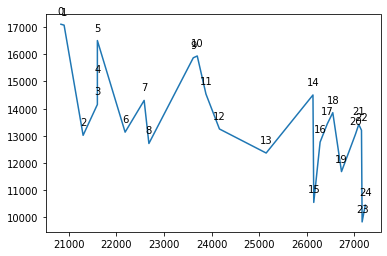

In [11]:
x = []
y = []
for i, j in cities:
    x.append(i)
    y.append(j)
import matplotlib.pyplot as plt
plt.plot(x, y)

# zip joins x and y coordinates in pairs
for i in range(n):

    label = i

    plt.annotate(label, # this is the text
                 (x[i],y[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [12]:
# Dynamic programming implementation, but is quite memory intensive
import numpy as np
from itertools import combinations

def dis(i, j):
    return np.sqrt((cities[i][0]-cities[j][0])**2+(cities[i][1]-cities[j][1])**2)


N = len(cities)
dic1 = {frozenset([0]): {0: 0}}

for m in range(1, N):
    comb = list(combinations(range(1, N), m))
    dic2 = {frozenset(comb[i]): {list(comb[i])[j]: 0 for j in range(m)} for i in range(len(comb))}
    for s in dic2:
        for j in s:
            ans = []
            if m == 1:
                dic2[s][j] = dis(0, j)
            else:
                sj = set(s)
                sj.remove(j)
                dic2[s][j] = min([dic1[frozenset(sj)][k]+dis(k, j) for k in sj if k != j])
    dic1 = dic2.copy()

tsp = min([dic2[frozenset(comb[0])][j]+dis(0, j) for j in range(1, N)])
print("Answer: " + str(int(tsp)))

Answer: 26442


In [15]:
# Alternative:
# 1. Eyeball estimation of the possible solution
# 2. Test out n-flipping as a local optimum search
# I happen to only need 5-flips to get the optimum solution

import numpy as np
from itertools import combinations, permutations

distdict = {}
comb = list(combinations(range(0, n), 2))
for i, j in comb:
    distdict[i, j] = np.sqrt((cities[i][0]-cities[j][0])**2+(cities[i][1]-cities[j][1])**2)

def tot(seq):
    tot = 0
    for i in range(0,25):
        if (seq[i-1], seq[i]) in distdict.keys():
            tot += distdict[seq[i-1], seq[i]]
        else:
            tot += distdict[seq[i], seq[i-1]]
    return tot

def mix(arr): # aka derangement
    n = len(arr)
    res = [[] for i in range(countDer(n))]
    ind = 0
    for i in permutations(arr, len(arr)):
        accept = True
        for j in range(n):
            if i[j] == arr[j]:
                accept = False
        if accept:
            res[ind] = list(i)
            ind += 1
    return res

def countDer(n):
    if (n == 1): return 0
    if (n == 2): return 1
     
    return (n - 1) * (countDer(n - 1) + countDer(n - 2))

def flipSearch(seq, currbest, n):
    comb = list(combinations(range(len(seq)), n))
    bestseq = seq.copy()
    for i in comb:
        mixind = mix(i)
        for j in mixind:
            seqcopy = seq.copy()
            for k in range(len(i)):
                seqcopy[i[k]] = seq[j[k]]
            dist = tot(seqcopy)
            if dist < currbest:
                currbest = dist
                bestseq = seqcopy.copy()
    return bestseq, currbest


In [19]:
# my estimate:
seq = [0,1,5,9,10,11,14,16,17,18,20,21,22,24,23,19,15,13,12,8,7,6,2,3,4]
minres = tot(seq)
print("Estimated path: " + str(seq))
print("Estimated distance: " + str(minres))
for i in [2,3,4,5]:
    print("Performing " + str(i) + "-flipping...")
    seq, minres = flipSearch(seq, minres, i)
    print("Path: " + str(seq))
    print("Best distance: " + str(minres))
print("Final answer: " + str(int(minres)))

Estimated path: [0, 1, 5, 9, 10, 11, 14, 16, 17, 18, 20, 21, 22, 24, 23, 19, 15, 13, 12, 8, 7, 6, 2, 3, 4]
Estimated distance: 30721.35870554566
Performing 2-flipping...
Path: [0, 1, 5, 9, 10, 11, 14, 16, 17, 18, 20, 21, 22, 19, 23, 24, 15, 13, 12, 8, 7, 6, 2, 3, 4]
Best distance: 29357.197606509893
Performing 3-flipping...
Path: [0, 1, 5, 9, 10, 11, 14, 18, 17, 22, 20, 21, 16, 19, 23, 24, 15, 13, 12, 8, 7, 6, 2, 3, 4]
Best distance: 28146.989794246838
Performing 4-flipping...
Path: [0, 1, 5, 9, 10, 11, 14, 18, 17, 22, 20, 21, 16, 19, 23, 24, 15, 13, 12, 8, 6, 2, 3, 7, 4]
Best distance: 27344.08284584172
Performing 5-flipping...
Path: [0, 1, 5, 9, 10, 11, 14, 18, 17, 21, 22, 20, 16, 19, 24, 23, 15, 13, 12, 8, 6, 2, 3, 7, 4]
Best distance: 26442.730308954753
Final answer: 26442


# Programming Exercise 3

In this assignment we will revisit an old friend, the traveling salesman problem (TSP).  This week you will implement a heuristic for the TSP, rather than an exact algorithm, and as a result will be able to handle much larger problem sizes.  Here is a data file describing a TSP instance (original source: http://www.math.uwaterloo.ca/tsp/world/bm33708.tsp).

(See C4W3_nn.txt)

The first line indicates the number of cities. Each city is a point in the plane, and each subsequent line indicates the x- and y-coordinates of a single city.

The distance between two cities is defined as the Euclidean distance --- that is, two cities at locations (x,y) and (z,w) have distance sqrt((x-z)^2 + (y-w)^2) between them.

You should implement the nearest neighbor heuristic:

Start the tour at the first city.

Repeatedly visit the closest city that the tour hasn't visited yet.  In case of a tie, go to the closest city with the lowest index.  For example, if both the third and fifth cities have the same distance from the first city (and are closer than any other city), then the tour should begin by going from the first city to the third city.

Once every city has been visited exactly once, return to the first city to complete the tour.

In the box below, enter the cost of the traveling salesman tour computed by the nearest neighbor heuristic for this instance, rounded down to the nearest integer.

[Hint: when constructing the tour, you might find it simpler to work with squared Euclidean distances (i.e., the formula above but without the square root) than Euclidean distances.  But don't forget to report the length of the tour in terms of standard Euclidean distance.]

In [20]:
import numpy as np

text_file = open("C4W3_nn.txt", "r")
lines = text_file.readlines()
data = [i.strip().split(" ") for i in lines[0:]]
n = int(data[0][0])
cities = {int(i[0]):[float(i[1]), float(i[2])] for i in data[1:]}
text_file.close()
print(cities[1])
print(cities[2])

[9983.3333, 98550.0]
[10000.0, 98533.3333]


In [21]:
travelled = [0 for i in range(n)]
ind = 0
notTravelled = list(range(2,n + 1))
lastTravelled = 1
tot_dist = 0
while notTravelled:
    if ind % 1000 == 0:
        print("Visited: " + str(ind) + " out of " + str(n) + " cities.")
    notTravelled = sorted(notTravelled,key=lambda x:((cities[x][0] - cities[lastTravelled][0])**2 + (cities[x][1] - cities[lastTravelled][1])**2, x))
    nextTravel = notTravelled[0]
    tot_dist += np.sqrt((cities[nextTravel][0] - cities[lastTravelled][0])**2 + (cities[nextTravel][1] - cities[lastTravelled][1])**2)
    travelled[ind] = lastTravelled
    lastTravelled = nextTravel
    ind += 1
    notTravelled.pop(0)

nextTravel = 1
tot_dist += np.sqrt((cities[nextTravel][0] - cities[lastTravelled][0])**2 + (cities[nextTravel][1] - cities[lastTravelled][1])**2)
print("Total distance (Answer): " + str(int(tot_dist)))

Visited: 0 out of 33708 cities.
Visited: 1000 out of 33708 cities.
Visited: 2000 out of 33708 cities.
Visited: 3000 out of 33708 cities.
Visited: 4000 out of 33708 cities.
Visited: 5000 out of 33708 cities.
Visited: 6000 out of 33708 cities.
Visited: 7000 out of 33708 cities.
Visited: 8000 out of 33708 cities.
Visited: 9000 out of 33708 cities.
Visited: 10000 out of 33708 cities.
Visited: 11000 out of 33708 cities.
Visited: 12000 out of 33708 cities.
Visited: 13000 out of 33708 cities.
Visited: 14000 out of 33708 cities.
Visited: 15000 out of 33708 cities.
Visited: 16000 out of 33708 cities.
Visited: 17000 out of 33708 cities.
Visited: 18000 out of 33708 cities.
Visited: 19000 out of 33708 cities.
Visited: 20000 out of 33708 cities.
Visited: 21000 out of 33708 cities.
Visited: 22000 out of 33708 cities.
Visited: 23000 out of 33708 cities.
Visited: 24000 out of 33708 cities.
Visited: 25000 out of 33708 cities.
Visited: 26000 out of 33708 cities.
Visited: 27000 out of 33708 cities.
Visit

# Programming Exercise 4

In this assignment you will implement one or more algorithms for the 2SAT problem.  Here are 6 different 2SAT instances:

(See C4W4_2sat1.txt to C4W4_2sat6.txt)

The file format is as follows.  In each instance, the number of variables and the number of clauses is the same, and this number is specified on the first line of the file.  Each subsequent line specifies a clause via its two literals, with a number denoting the variable and a "-" sign denoting logical "not".  For example, the second line of the first data file is "-16808 75250", which indicates the clause ¬x_{16808} ∨ x_{75250}.

Your task is to determine which of the 6 instances are satisfiable, and which are unsatisfiable.  In the box below, enter a 6-bit string, where the ith bit should be 1 if the ith instance is satisfiable, and 0 otherwise.  For example, if you think that the first 3 instances are satisfiable and the last 3 are not, then you should enter the string 111000 in the box below.

DISCUSSION: This assignment is deliberately open-ended, and you can implement whichever 2SAT algorithm you want.  For example, 2SAT reduces to computing the strongly connected components of a suitable graph (with two vertices per variable and two directed edges per clause, you should think through the details).  This might be an especially attractive option for those of you who coded up an SCC algorithm in Part 2 of this specialization.  Alternatively, you can use Papadimitriou's randomized local search algorithm.  (The algorithm from lecture is probably too slow as stated, so you might want to make one or more simple modifications to it --- even if this means breaking the analysis given in lecture --- to ensure that it runs in a reasonable amount of time.)  A third approach is via backtracking.  In lecture we mentioned this approach only in passing; see Chapter 9 of the Dasgupta-Papadimitriou-Vazirani book, for example, for more details.